In [146]:
import pandas as pd
import numpy as np
import os
import sys
#from PIL import Image, ImageFilter
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from tqdm import tqdm
import warnings
import pickle

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

In [147]:
#image shape to resize to
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1

#location of input data
test_path = 'C:/CompetitionData/stage1_test/'
test_ids = pd.DataFrame(next(os.walk(test_path))[1])
test_ids.columns = ['image_id']
test_ids['original_size'] = None

#output pickle locations for X_test and test file sizes outputs
output_test_pickle = 'C:/CompetitionData/X_test.p'
output_test_sizes = 'C:/CompetitionData/test_file_sizes.csv'

In [148]:
def rgbToGray(img):
    grayImg = 0.0722*img[:,:,0] + 0.7152*img[:,:,1] + 0.2126*img[:,:,2]
    #print(grayImg.shape)   
    return np.expand_dims(grayImg, axis=2)

In [149]:
def paddingImg(img):
    #Begin padding routine
    desired_size = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.uint8)

    desired_size[:img.shape[0],:img.shape[1],:1] = img
    
    return desired_size

In [150]:
def resizer(img):
    desired_size = resize(img, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant', preserve_range=True)
    return desired_size

In [157]:
# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []

print('Getting and resizing test images ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(np.array(test_ids['image_id'])), total=len(test_ids)):
    fn_ = ''.join([test_path,id_,'/images/',id_,'.png'])
    img = imread(fn_)[:,:,:3]
    #print(img.shape)
    orig_file_height, orig_file_width = img.shape[0:2]
    test_ids.loc[test_ids.image_id == id_, 'original_size'] = ''.join(['(',str(orig_file_height),',',str(orig_file_width),')'])

    #Grey scale conversion
    img = rgbToGray(img) 
    
    #Begin padding routine
    #pad if necessary
    #if (img.shape[0] <= IMG_HEIGHT) and (img.shape[1] <= IMG_WIDTH):
     #   img = paddingImg(img)


    #resize if necessary
    #else:
    if (orig_file_height != IMG_HEIGHT) or (orig_file_width != IMG_WIDTH):
        img = resizer(img)

    
    #print(desired_size.shape)
    X_test[n] = img
    
print('Done!')

Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 67.08it/s]


Done!


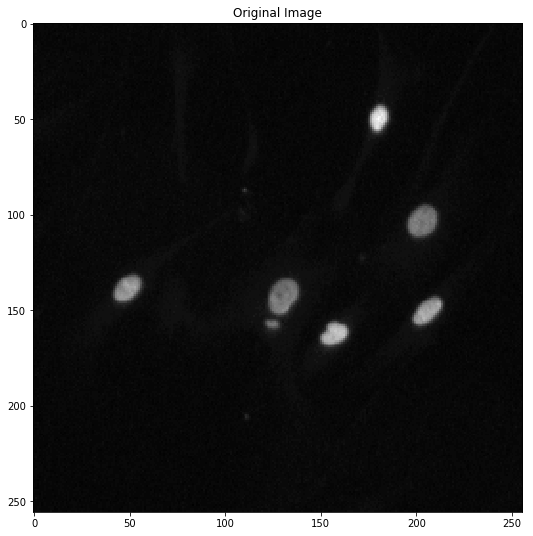

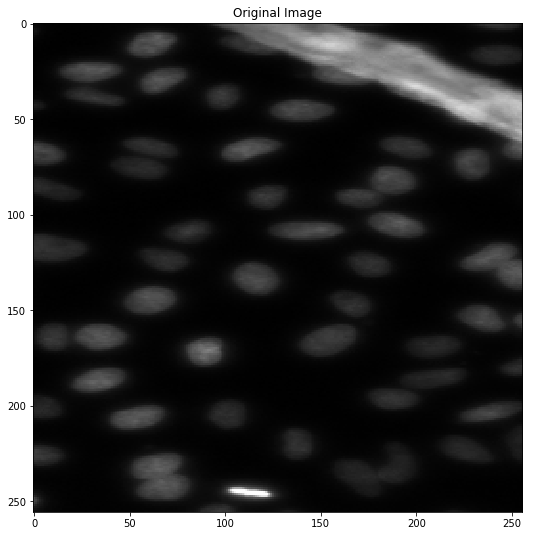

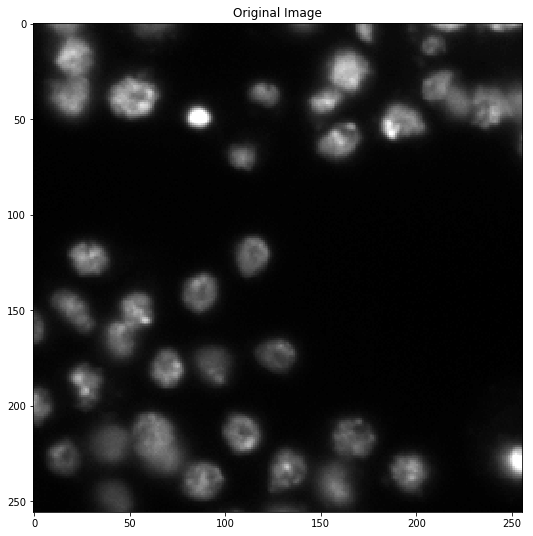

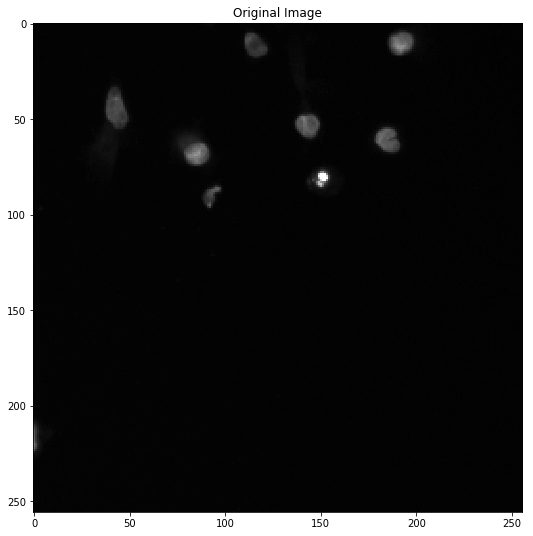

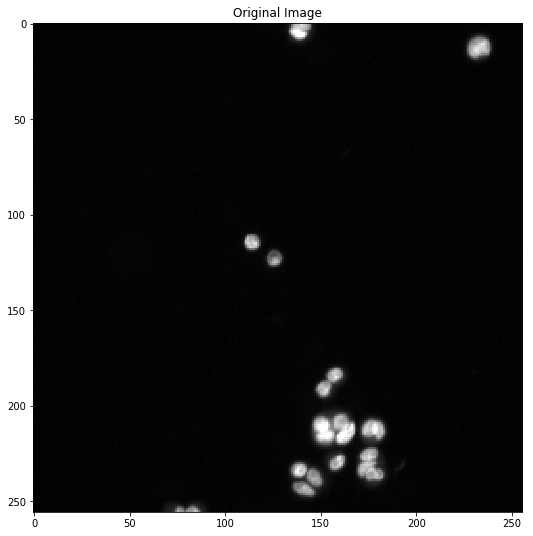

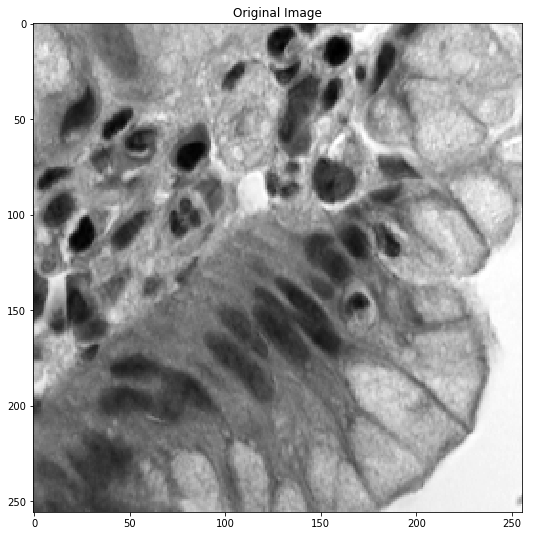

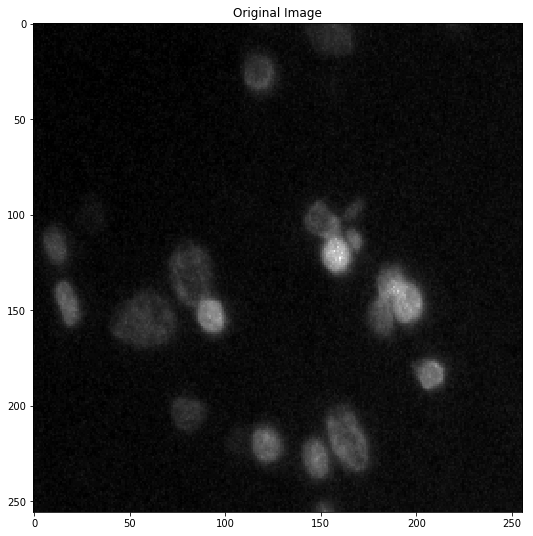

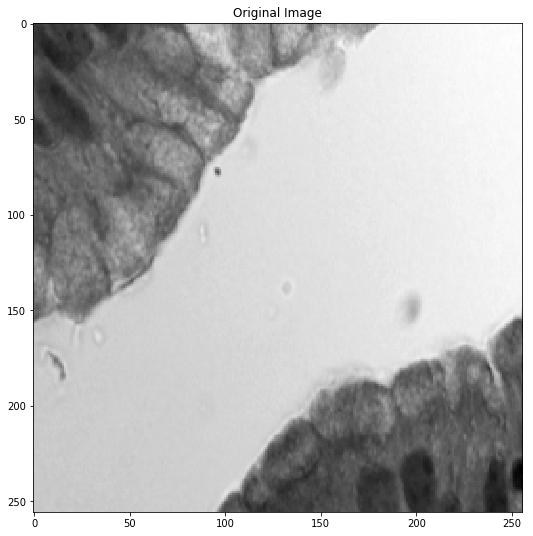

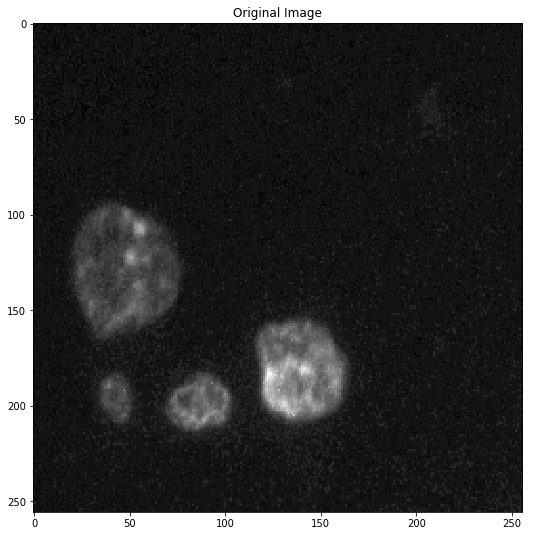

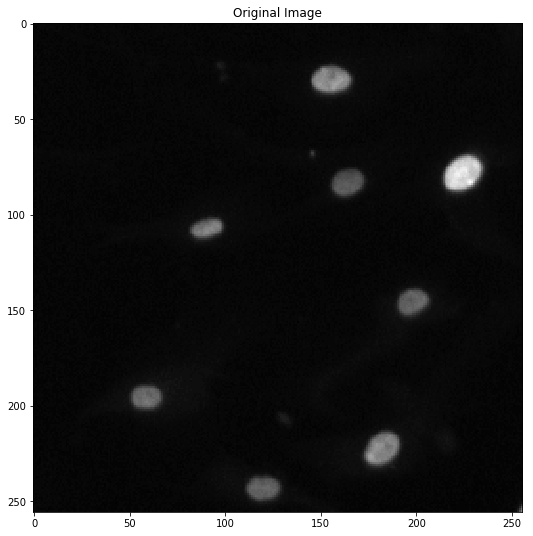

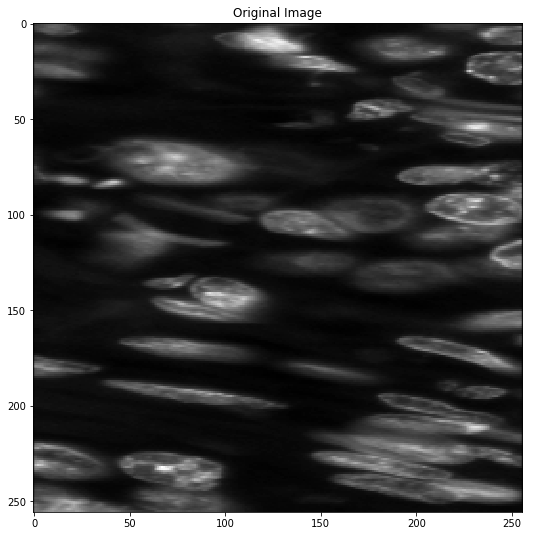

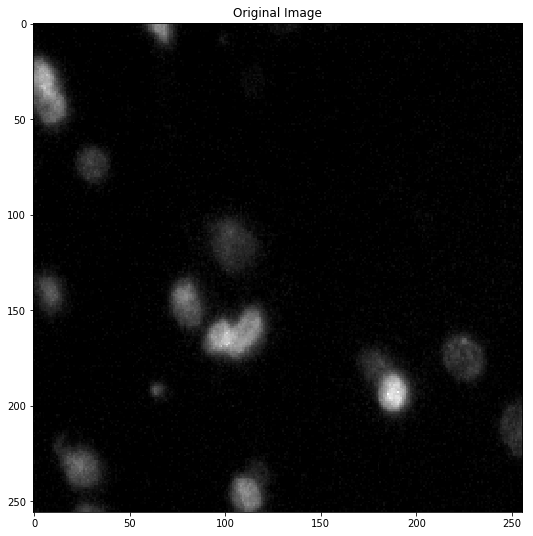

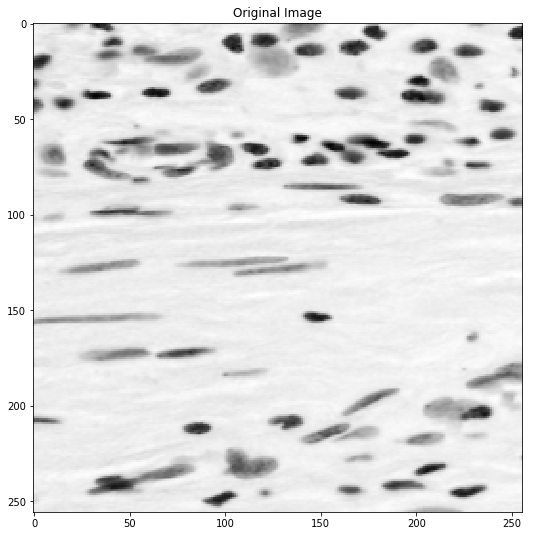

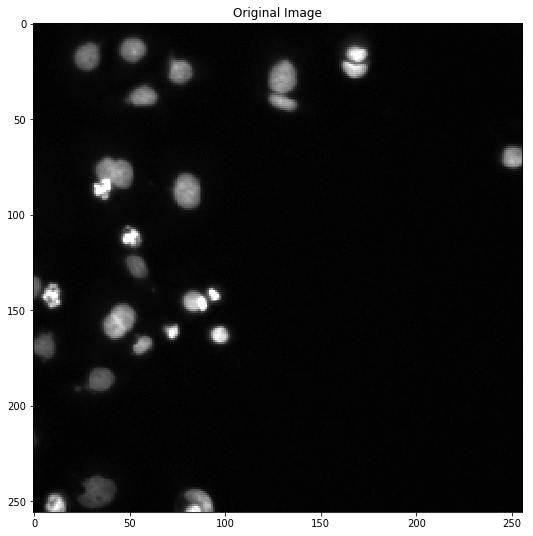

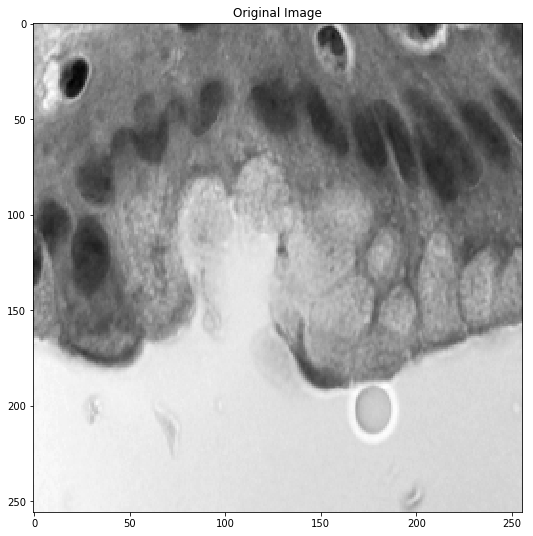

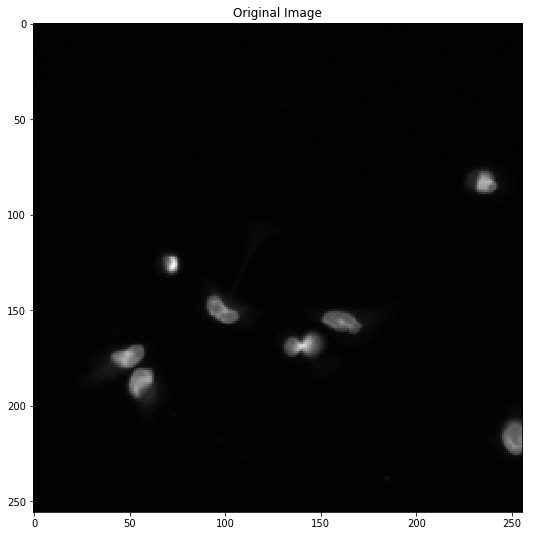

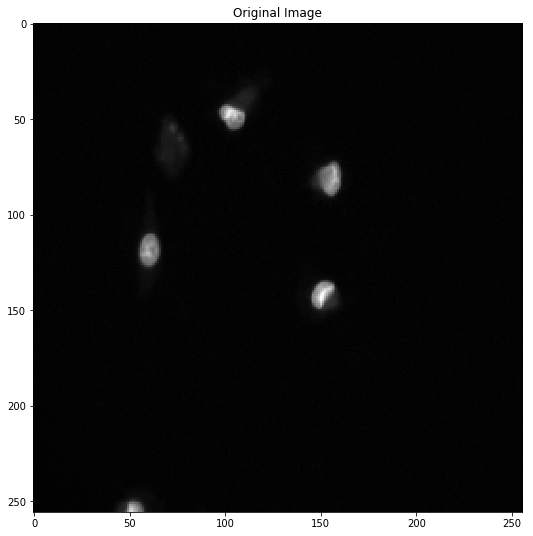

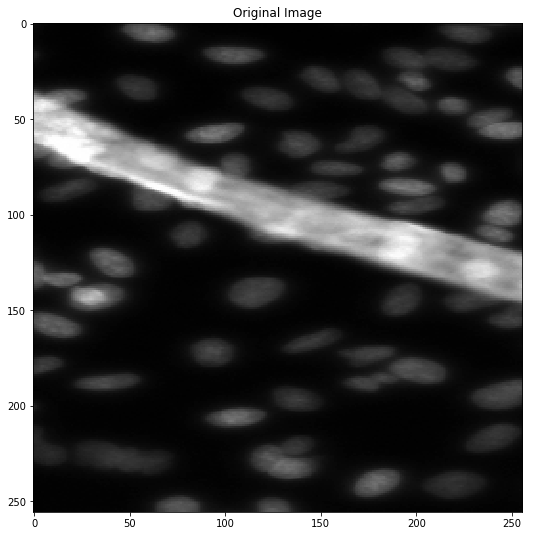

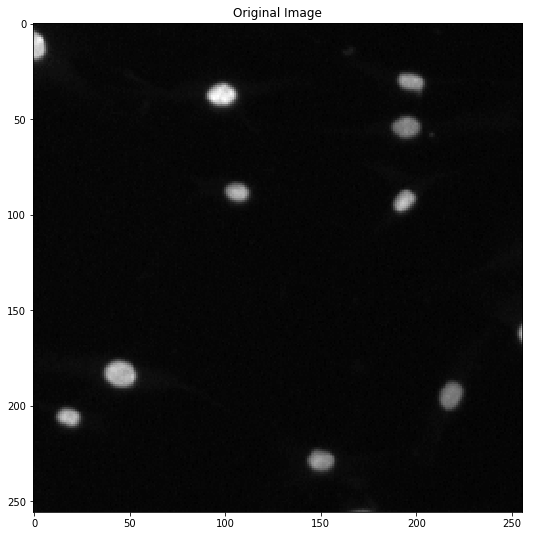

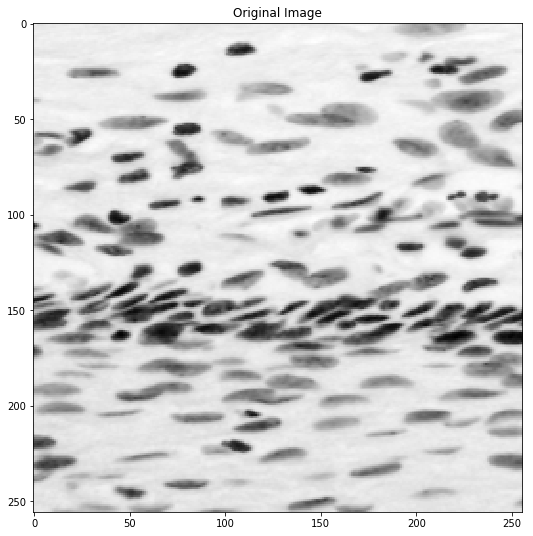

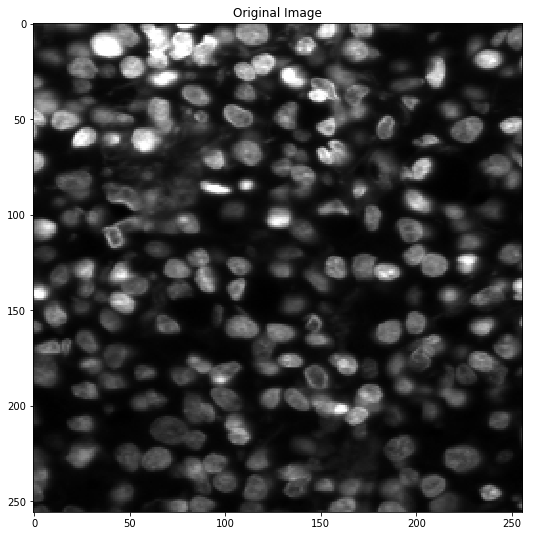

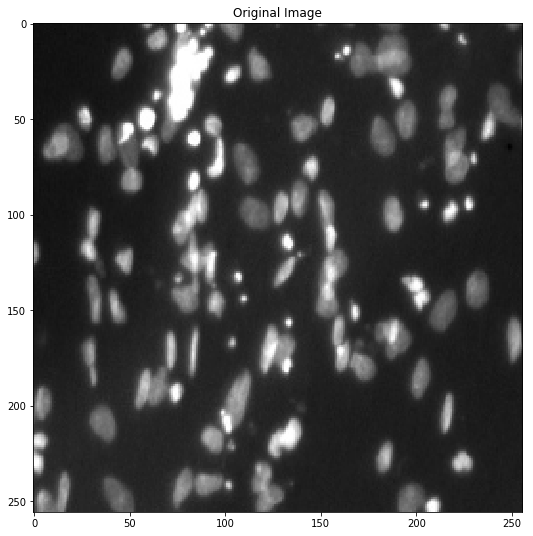

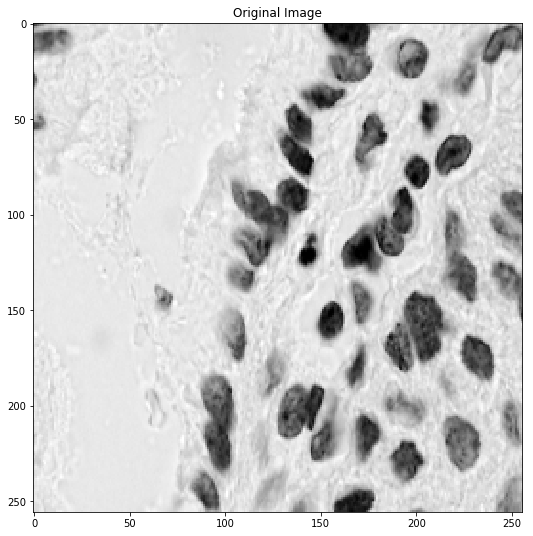

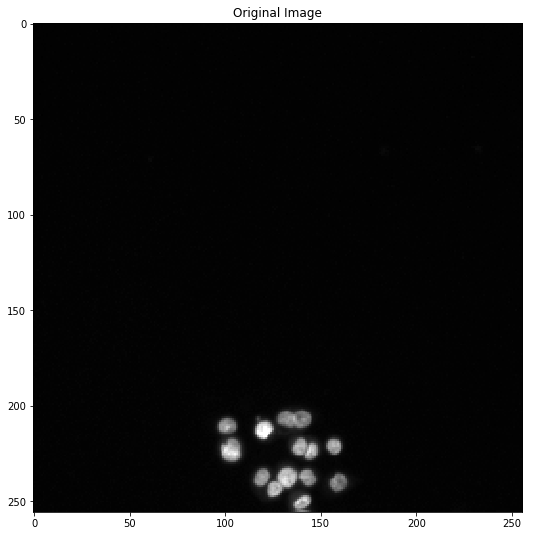

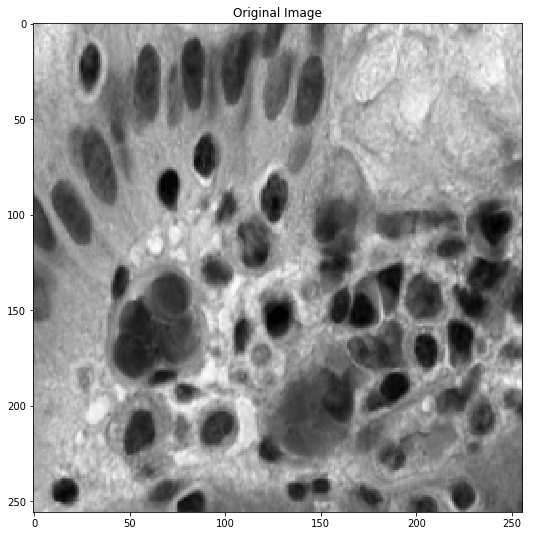

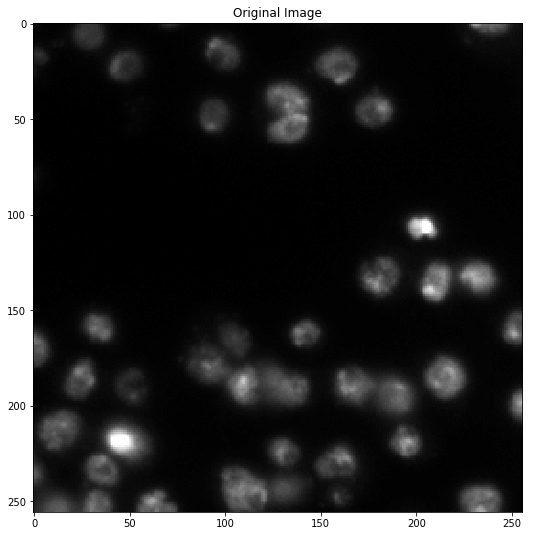

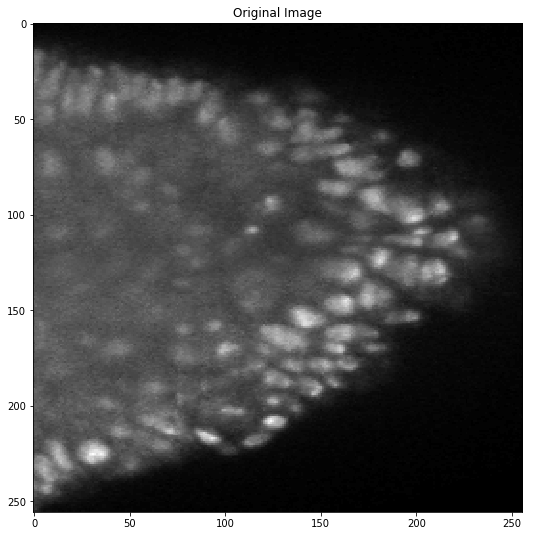

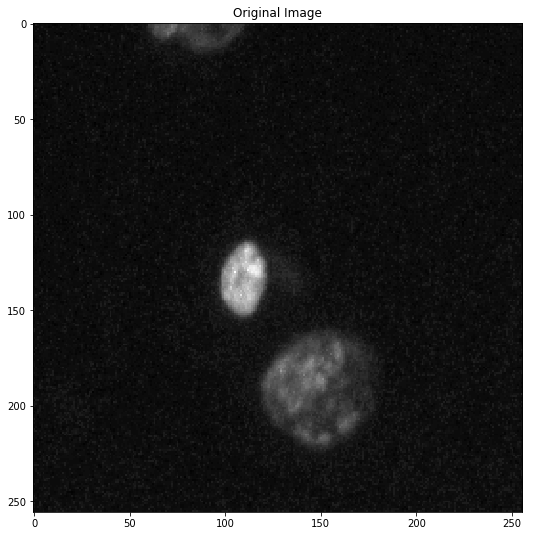

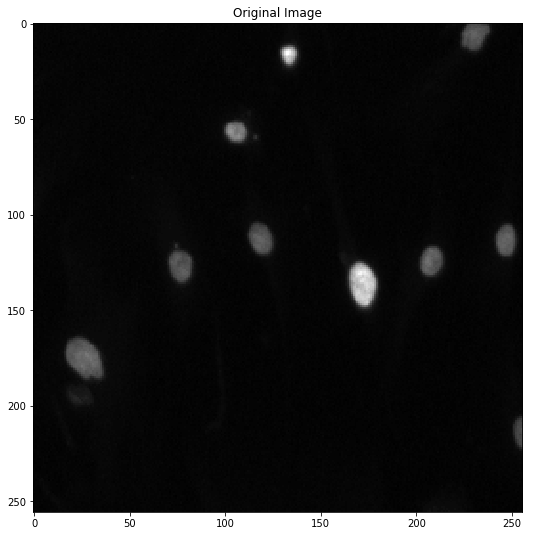

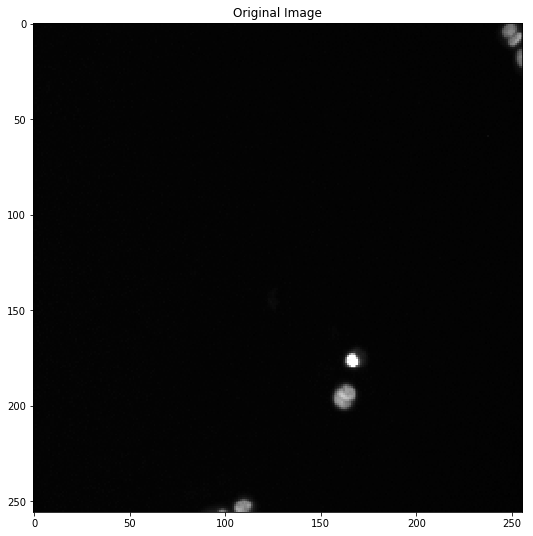

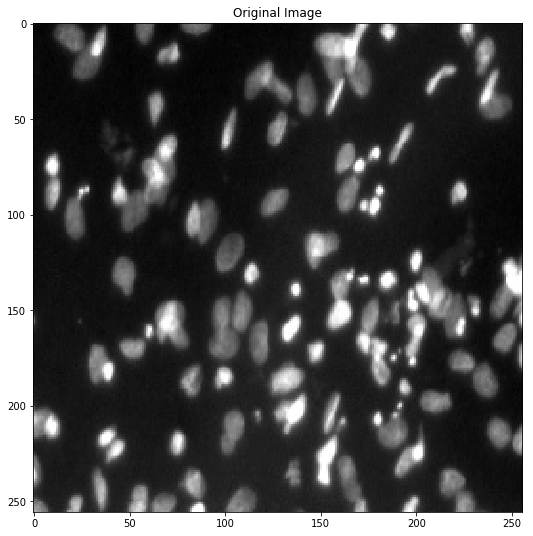

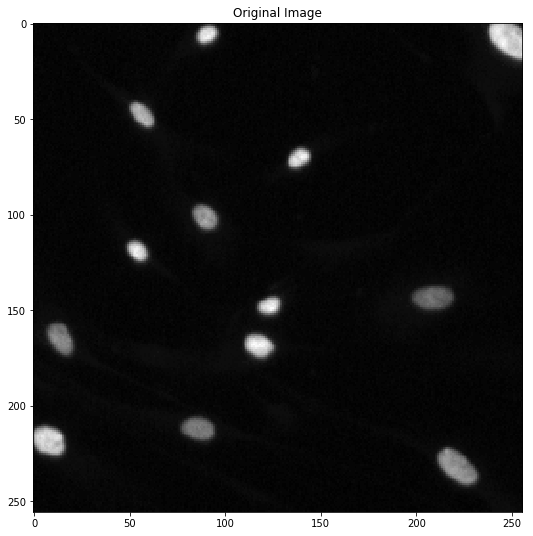

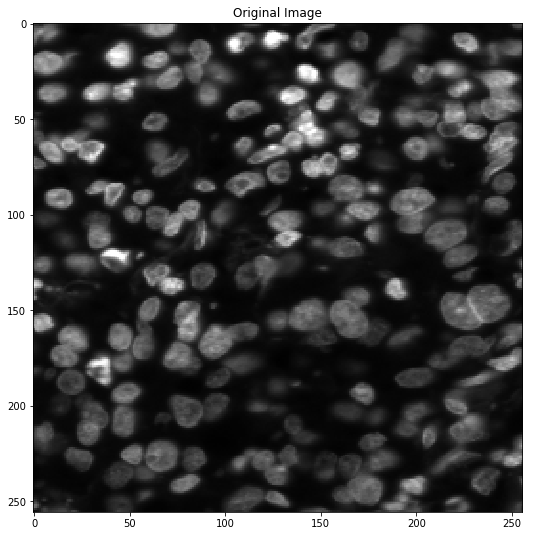

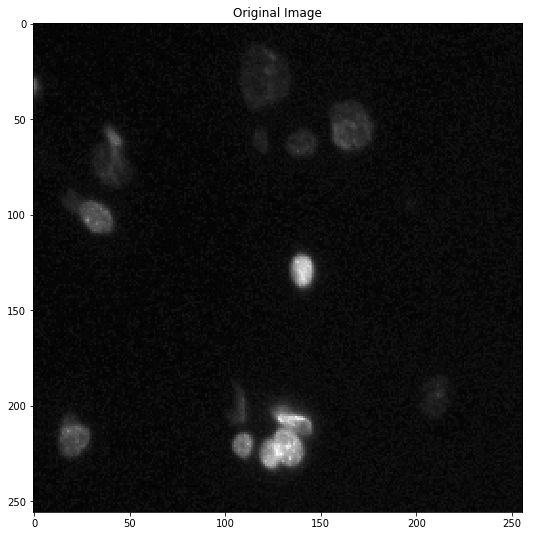

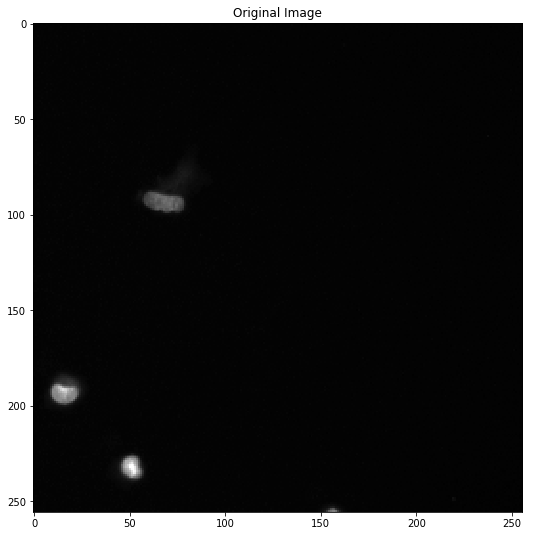

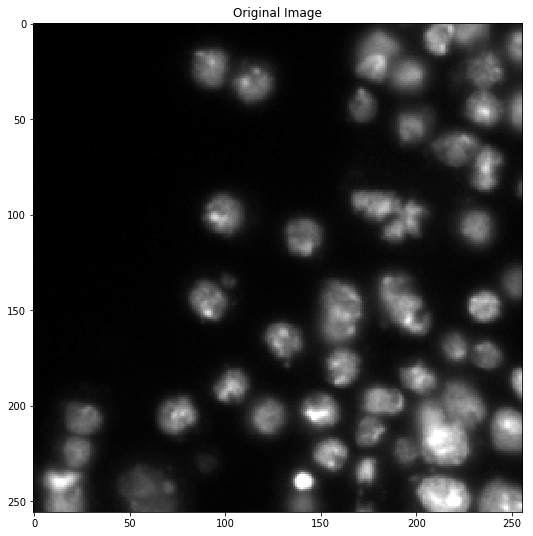

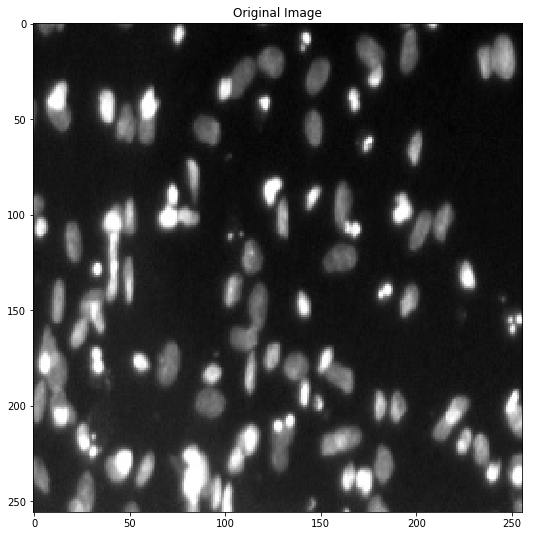

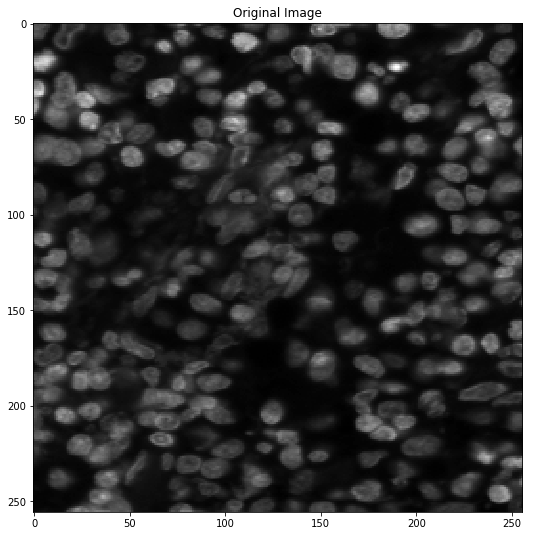

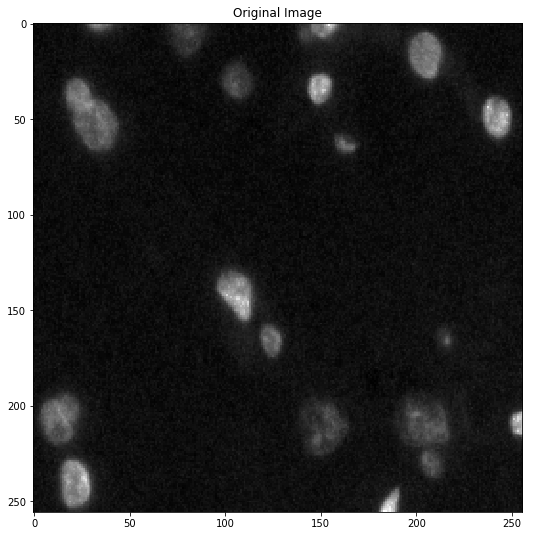

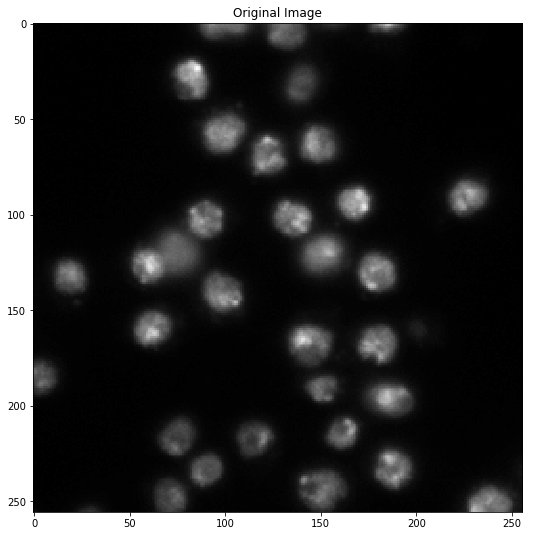

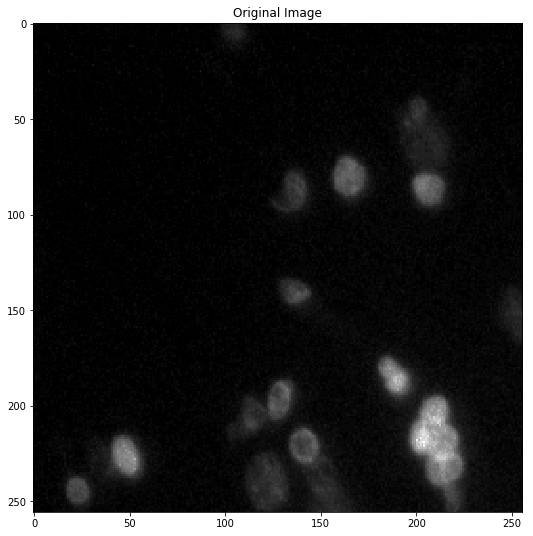

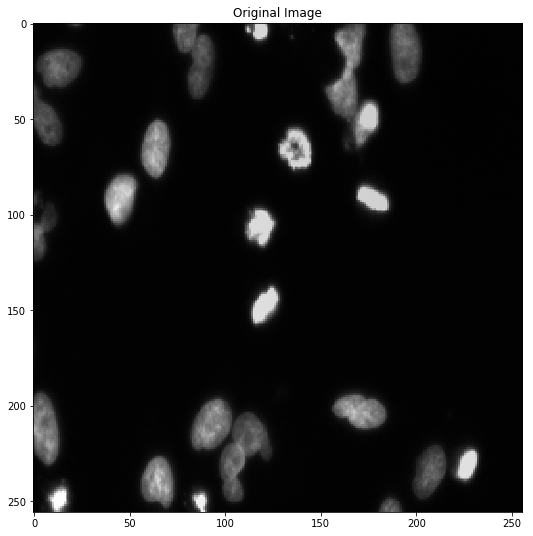

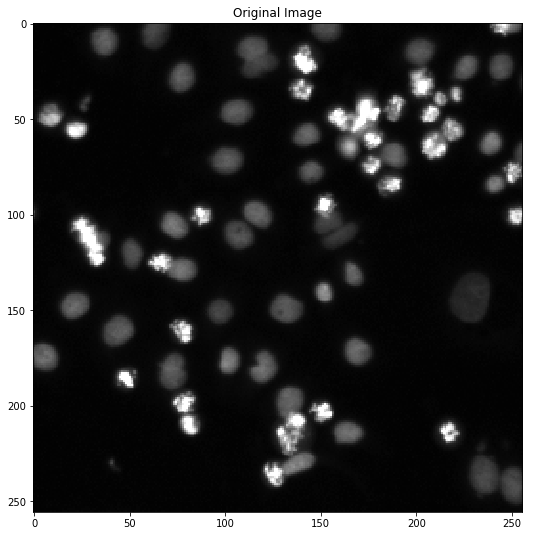

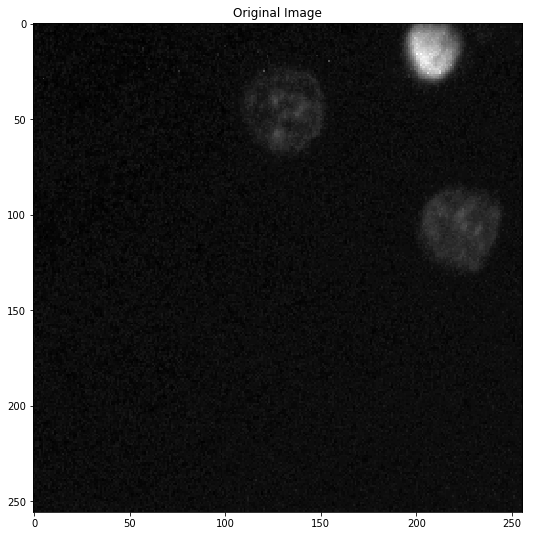

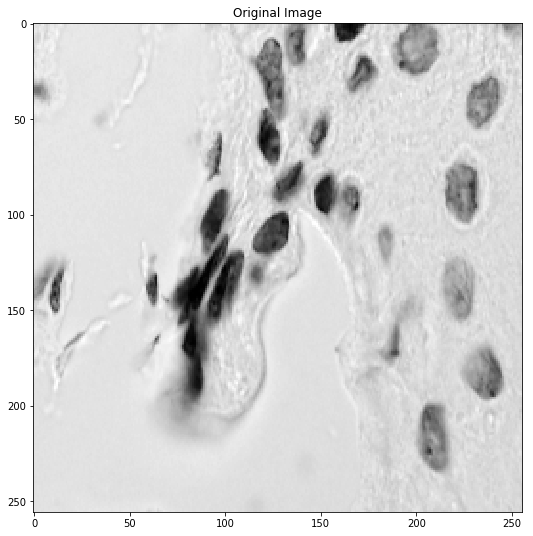

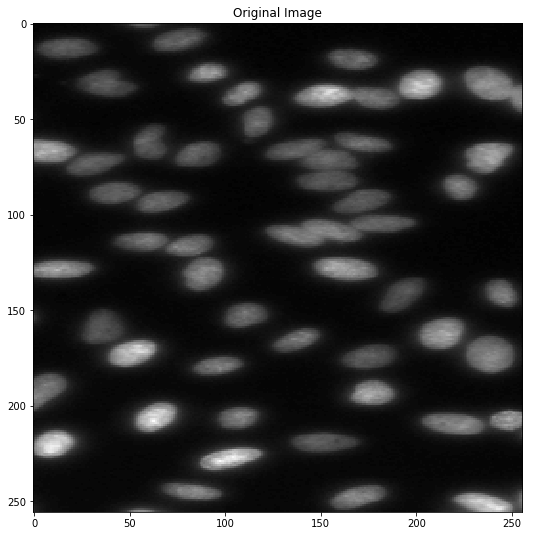

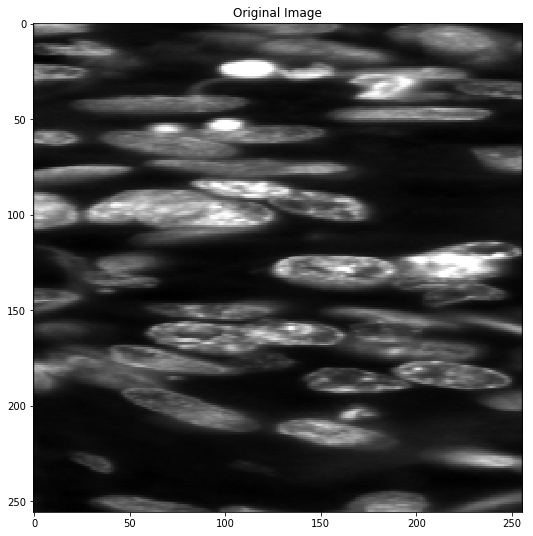

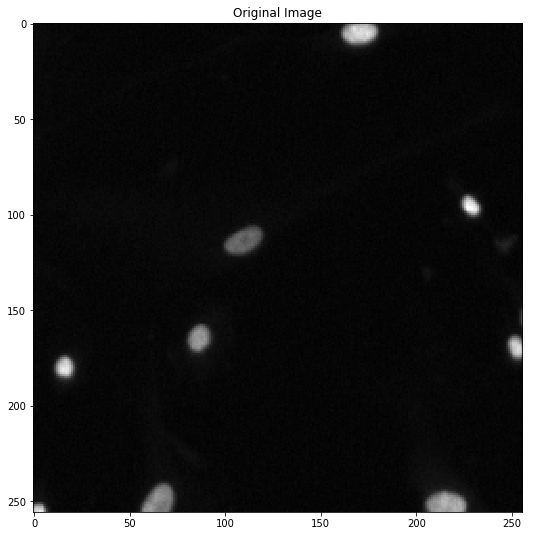

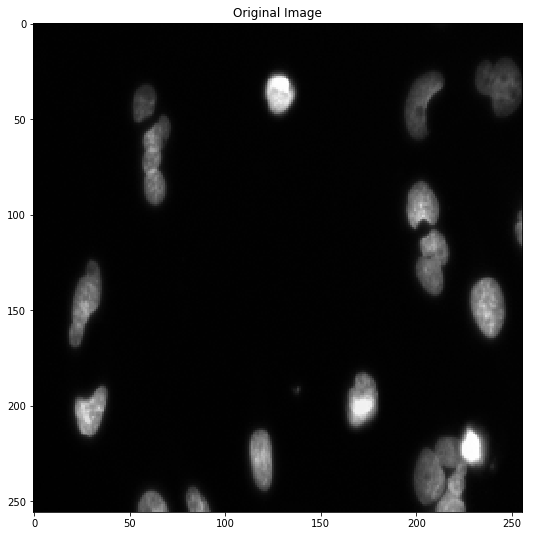

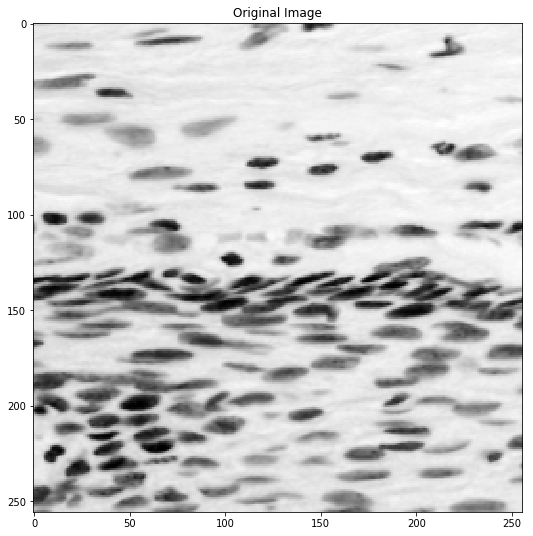

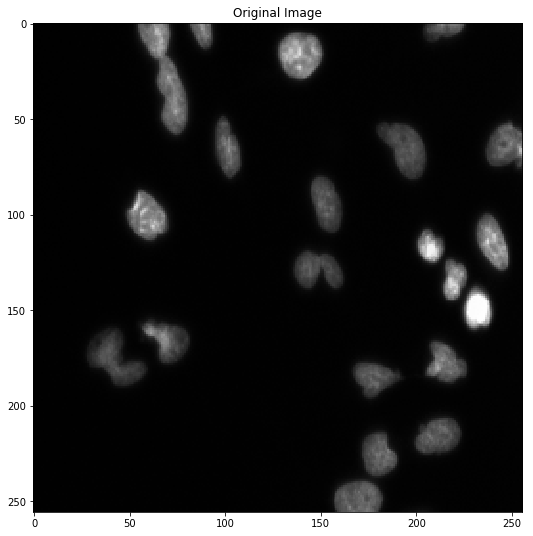

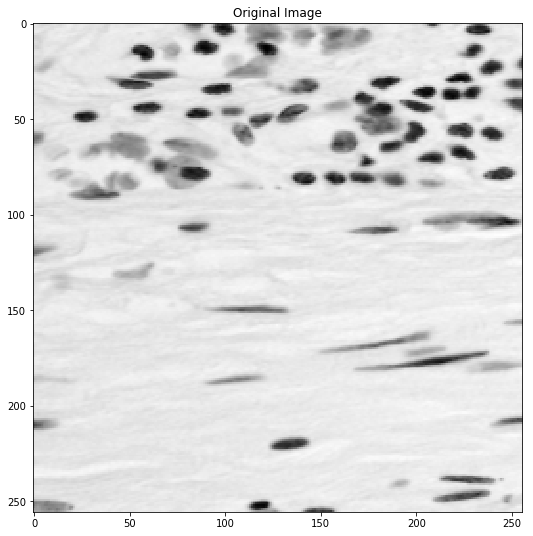

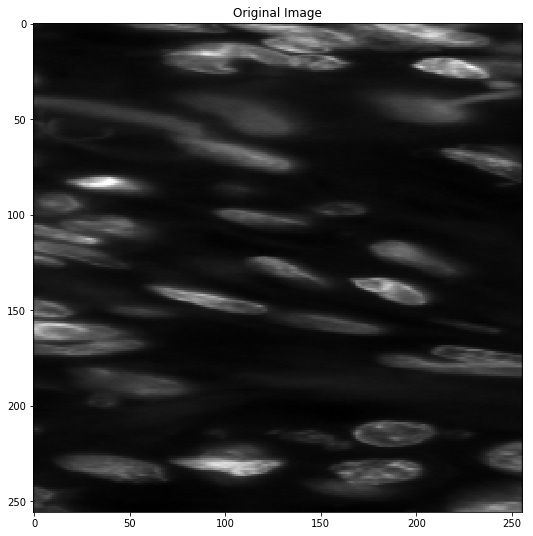

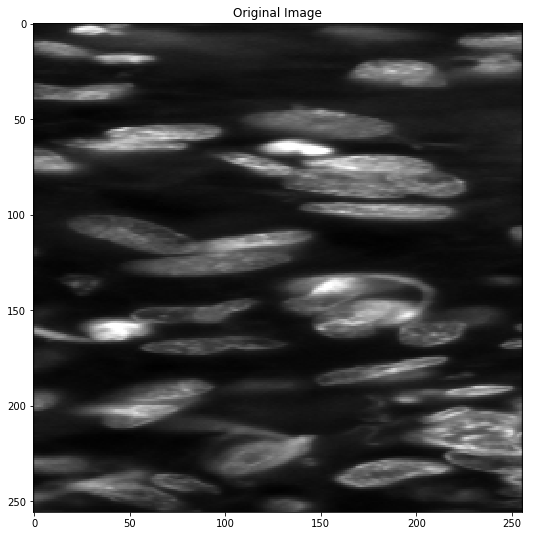

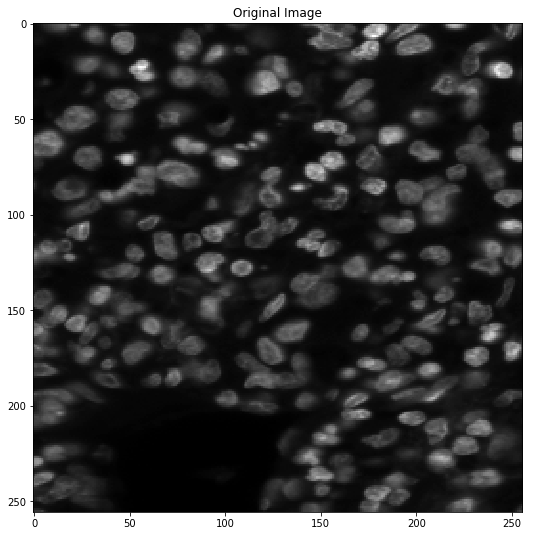

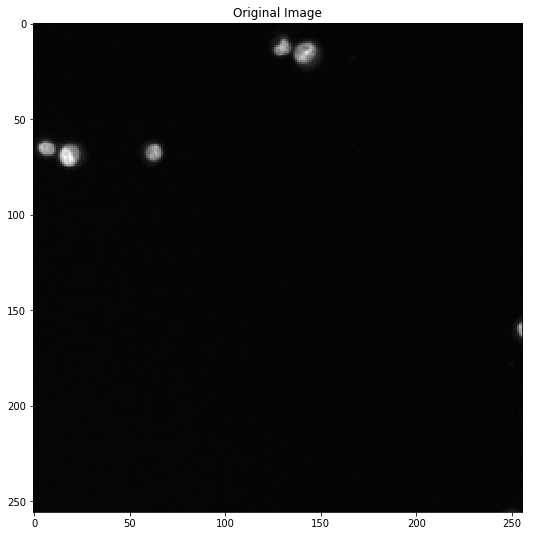

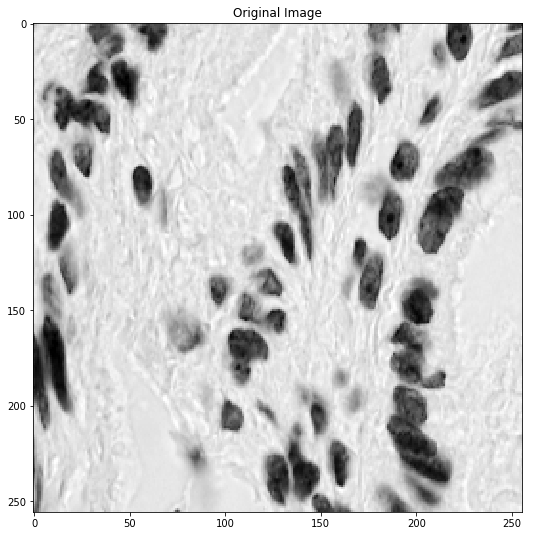

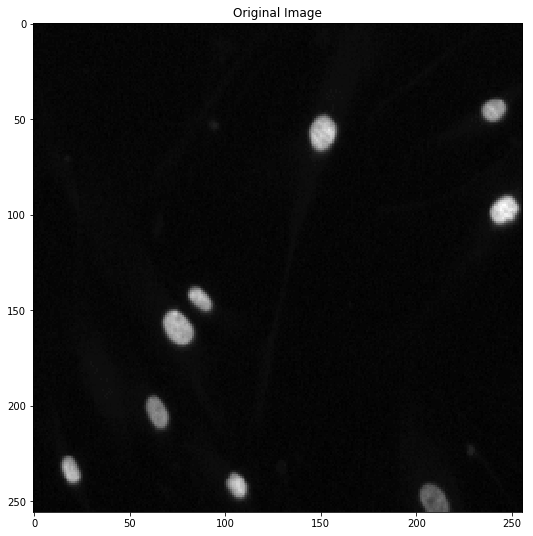

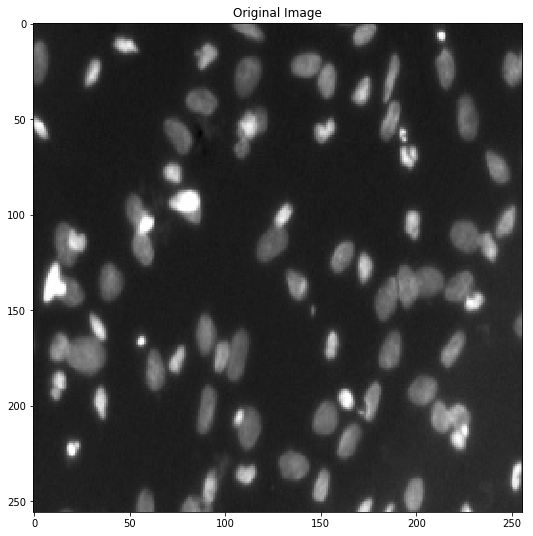

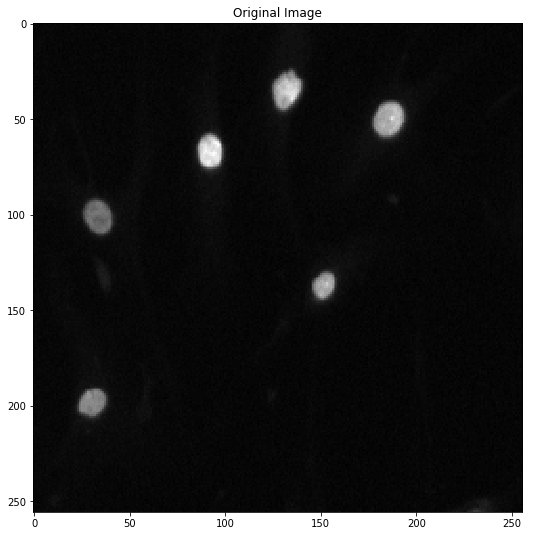

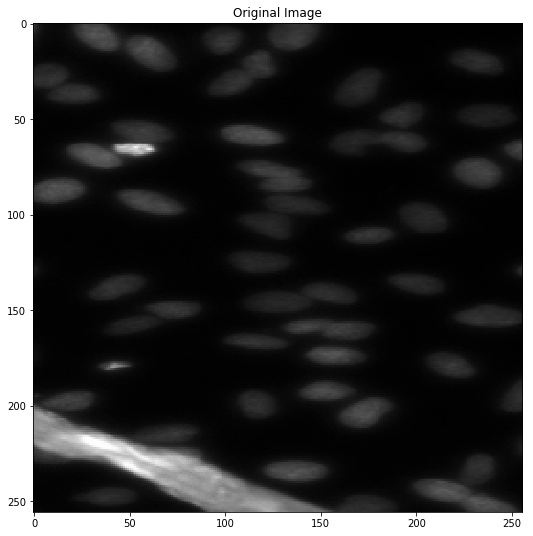

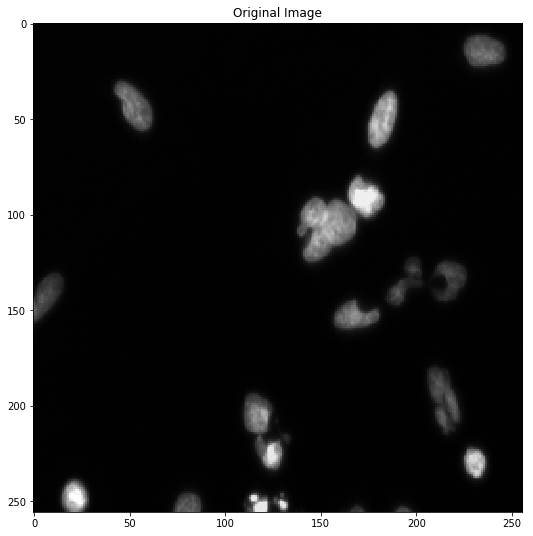

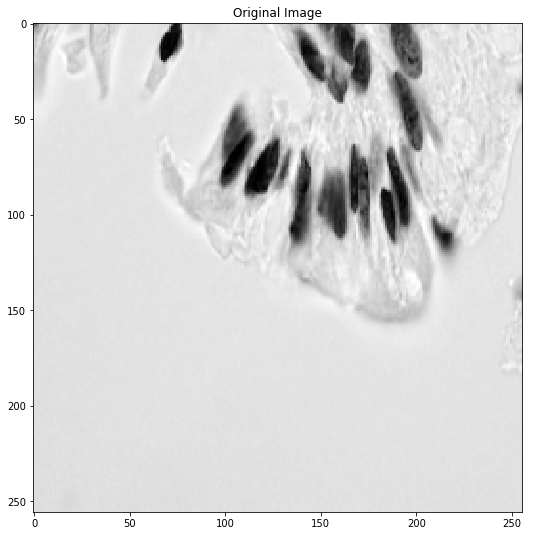

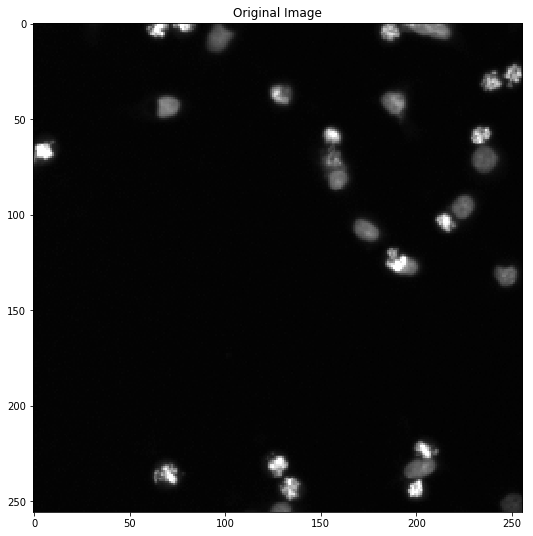

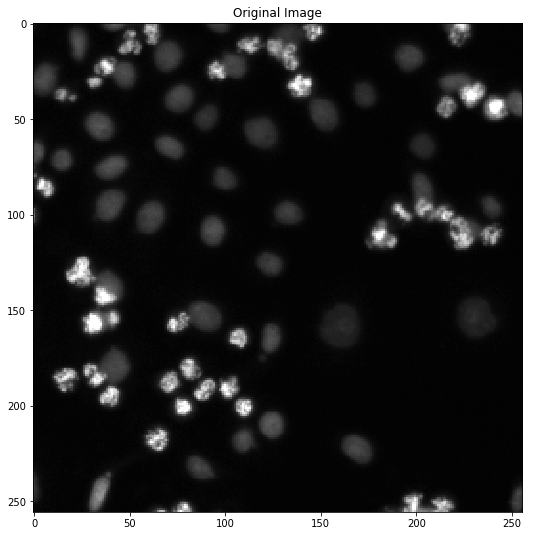

In [158]:
import matplotlib.pyplot as plt

# Check if training data looks all right
for n in range(len(X_test)):
    #ix = random.randint(0, len(X_test))
    f, ax = plt.subplots(1,1,figsize=(15,9))
    ax.imshow(np.squeeze(X_test[n]),cmap="gray")
    ax.set_title('Original Image')

    plt.show()

In [159]:
#save the pickle and CSV files
pickle.dump(X_test, open(output_test_pickle, "wb"))
test_ids.to_csv(output_test_sizes)
print("Pickle files generated.")

Pickle files generated.
